In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv("D:\\Learn\\Uni\\ML\\CapstoneProject\\data\\healthcare-dataset-stroke-data.csv")

In [25]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [26]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


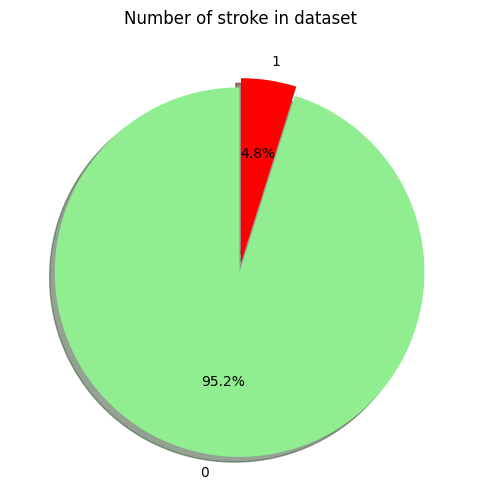

In [27]:
labels = df['stroke'].value_counts(sort=True).index
sizes = df['stroke'].value_counts(sort=True)

color = ["lightgreen","red"]
explode = (0.05,0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=color, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Number of stroke in dataset")
plt.show()

In [28]:
df['bmi'].isna().sum()

201

# Pre-processing

Use kNN imputation to fix the missing value in BMI

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import plotly.figure_factory as ff

In [30]:
# le = LabelEncoder()
# en_df = df.apply(le.fit_transform)
# en_df.head()

In [31]:
# en_df_imputed = en_df
# imputer = KNNImputer(n_neighbors=5, weights="uniform")
# imputer.fit_transform(en_df_imputed)

In [32]:
# en_df_imputed.isna().sum()

In [33]:
df = df.fillna(np.mean(df['bmi']))

In [34]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.221374,0.097279,0.054022,106.196449,28.888509,0.048346
std,22.612008,0.296367,0.226084,45.299060,7.698839,0.214517
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.260000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.890000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.180000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [36]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

In [38]:
y = df['stroke']
X = df[features]

In [39]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7779, 10) (1945, 10) (7779,) (1945,)


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [42]:
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)
    
  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state =0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

 

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
    
  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
    
    
    
    
 #Using xgboostClassifier of tree class to use Decision Tree Algorithm
  from xgboost import XGBClassifier 
  xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
  xgboost.fit(X_train, Y_train)
    
    
    
 #Using  SGDClassifierr of tree class to use Decision Tree Algorithm    
  from sklearn.linear_model import SGDClassifier
  SGD = SGDClassifier()
  SGD.fit(X_train, Y_train)
    
    
  #Using  AdaBoostClassifier of tree class to use Decision Tree Algorithm    
  from sklearn.ensemble import AdaBoostClassifier
  Ada = AdaBoostClassifier(n_estimators=2000, random_state = 0)
  Ada.fit(X_train, Y_train)
    
    
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train)*100)
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train)*100)
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train)*100)
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train)*100)
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train)*100)
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train)*100)
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train)*100)
  print('[7]Xgboost Classifier Training Accuracy:', xgboost.score(X_train, Y_train)*100)
  print('[8]SGD Classifier Training Accuracy:', SGD.score(X_train, Y_train)*100)
  print('[9]AdaBoost Classifier Training Accuracy:', Ada.score(X_train, Y_train)*100)

  return log, knn, svc_lin, svc_rbf, gauss,tree,forest,xgboost,SGD,Ada


In [43]:
# modelling = models(X_train_sc,y_train)
modelling = models(X_train,y_train)


[0]Logistic Regression Training Accuracy: 80.19025581694305
[1]K Nearest Neighbor Training Accuracy: 91.3999228692634
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 80.31880704460728
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 76.69366242447614
[4]Gaussian Naive Bayes Training Accuracy: 78.84046792646869
[5]Decision Tree Classifier Training Accuracy: 100.0
[6]Random Forest Classifier Training Accuracy: 100.0
[7]Xgboost Classifier Training Accuracy: 86.09075716673095
[8]SGD Classifier Training Accuracy: 77.9791747011184
[9]AdaBoost Classifier Training Accuracy: 91.86270728885461


In [44]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

for i in range(len(modelling)):
    cm = confusion_matrix(y_test, modelling[i].predict(X_test_sc))
    print(cm)
    accuracies = cross_val_score(estimator=modelling[i], X=X_train_sc, y=y_train, cv=10, n_jobs=-1)
    print(f'Model[{i}] Testing Accuracy = "{((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))*100} %!"')
    print(f"F-Fold Validation Mean Accuracy: {accuracies.mean()*100:2f}")
    print(f"Precision Score: {precision_score(y_test, modelling[i].predict(X_test_sc))*100} %")
    print(f"Recall Score: {recall_score(y_test, modelling[i].predict(X_test_sc))*100} %")
    print(f"F1 Score: {f1_score(y_test, modelling[i].predict(X_test_sc))*100} %")
    print()

[[824 140]
 [803 178]]
Model[0] Testing Accuracy = "51.51670951156812 %!"
F-Fold Validation Mean Accuracy: 80.112852
Precision Score: 55.9748427672956 %
Recall Score: 18.144750254842 %
F1 Score: 27.405696689761356 %

[[964   0]
 [981   0]]
Model[1] Testing Accuracy = "49.562982005141386 %!"
F-Fold Validation Mean Accuracy: 87.466295
Precision Score: 0.0 %
Recall Score: 0.0 %
F1 Score: 0.0 %

[[955   9]
 [960  21]]
Model[2] Testing Accuracy = "50.17994858611825 %!"
F-Fold Validation Mean Accuracy: 80.228683
Precision Score: 70.0 %
Recall Score: 2.1406727828746175 %
F1 Score: 4.154302670623145 %

[[964   0]
 [981   0]]
Model[3] Testing Accuracy = "49.562982005141386 %!"
F-Fold Validation Mean Accuracy: 85.036625
Precision Score: 0.0 %
Recall Score: 0.0 %
F1 Score: 0.0 %

[[964   0]
 [981   0]]
Model[4] Testing Accuracy = "49.562982005141386 %!"
F-Fold Validation Mean Accuracy: 78.493398
Precision Score: 0.0 %
Recall Score: 0.0 %
F1 Score: 0.0 %

[[964   0]
 [981   0]]
Model[5] Testing Ac